In [2]:
from preamble import *

w[0]: 0.393906  b: -0.031804


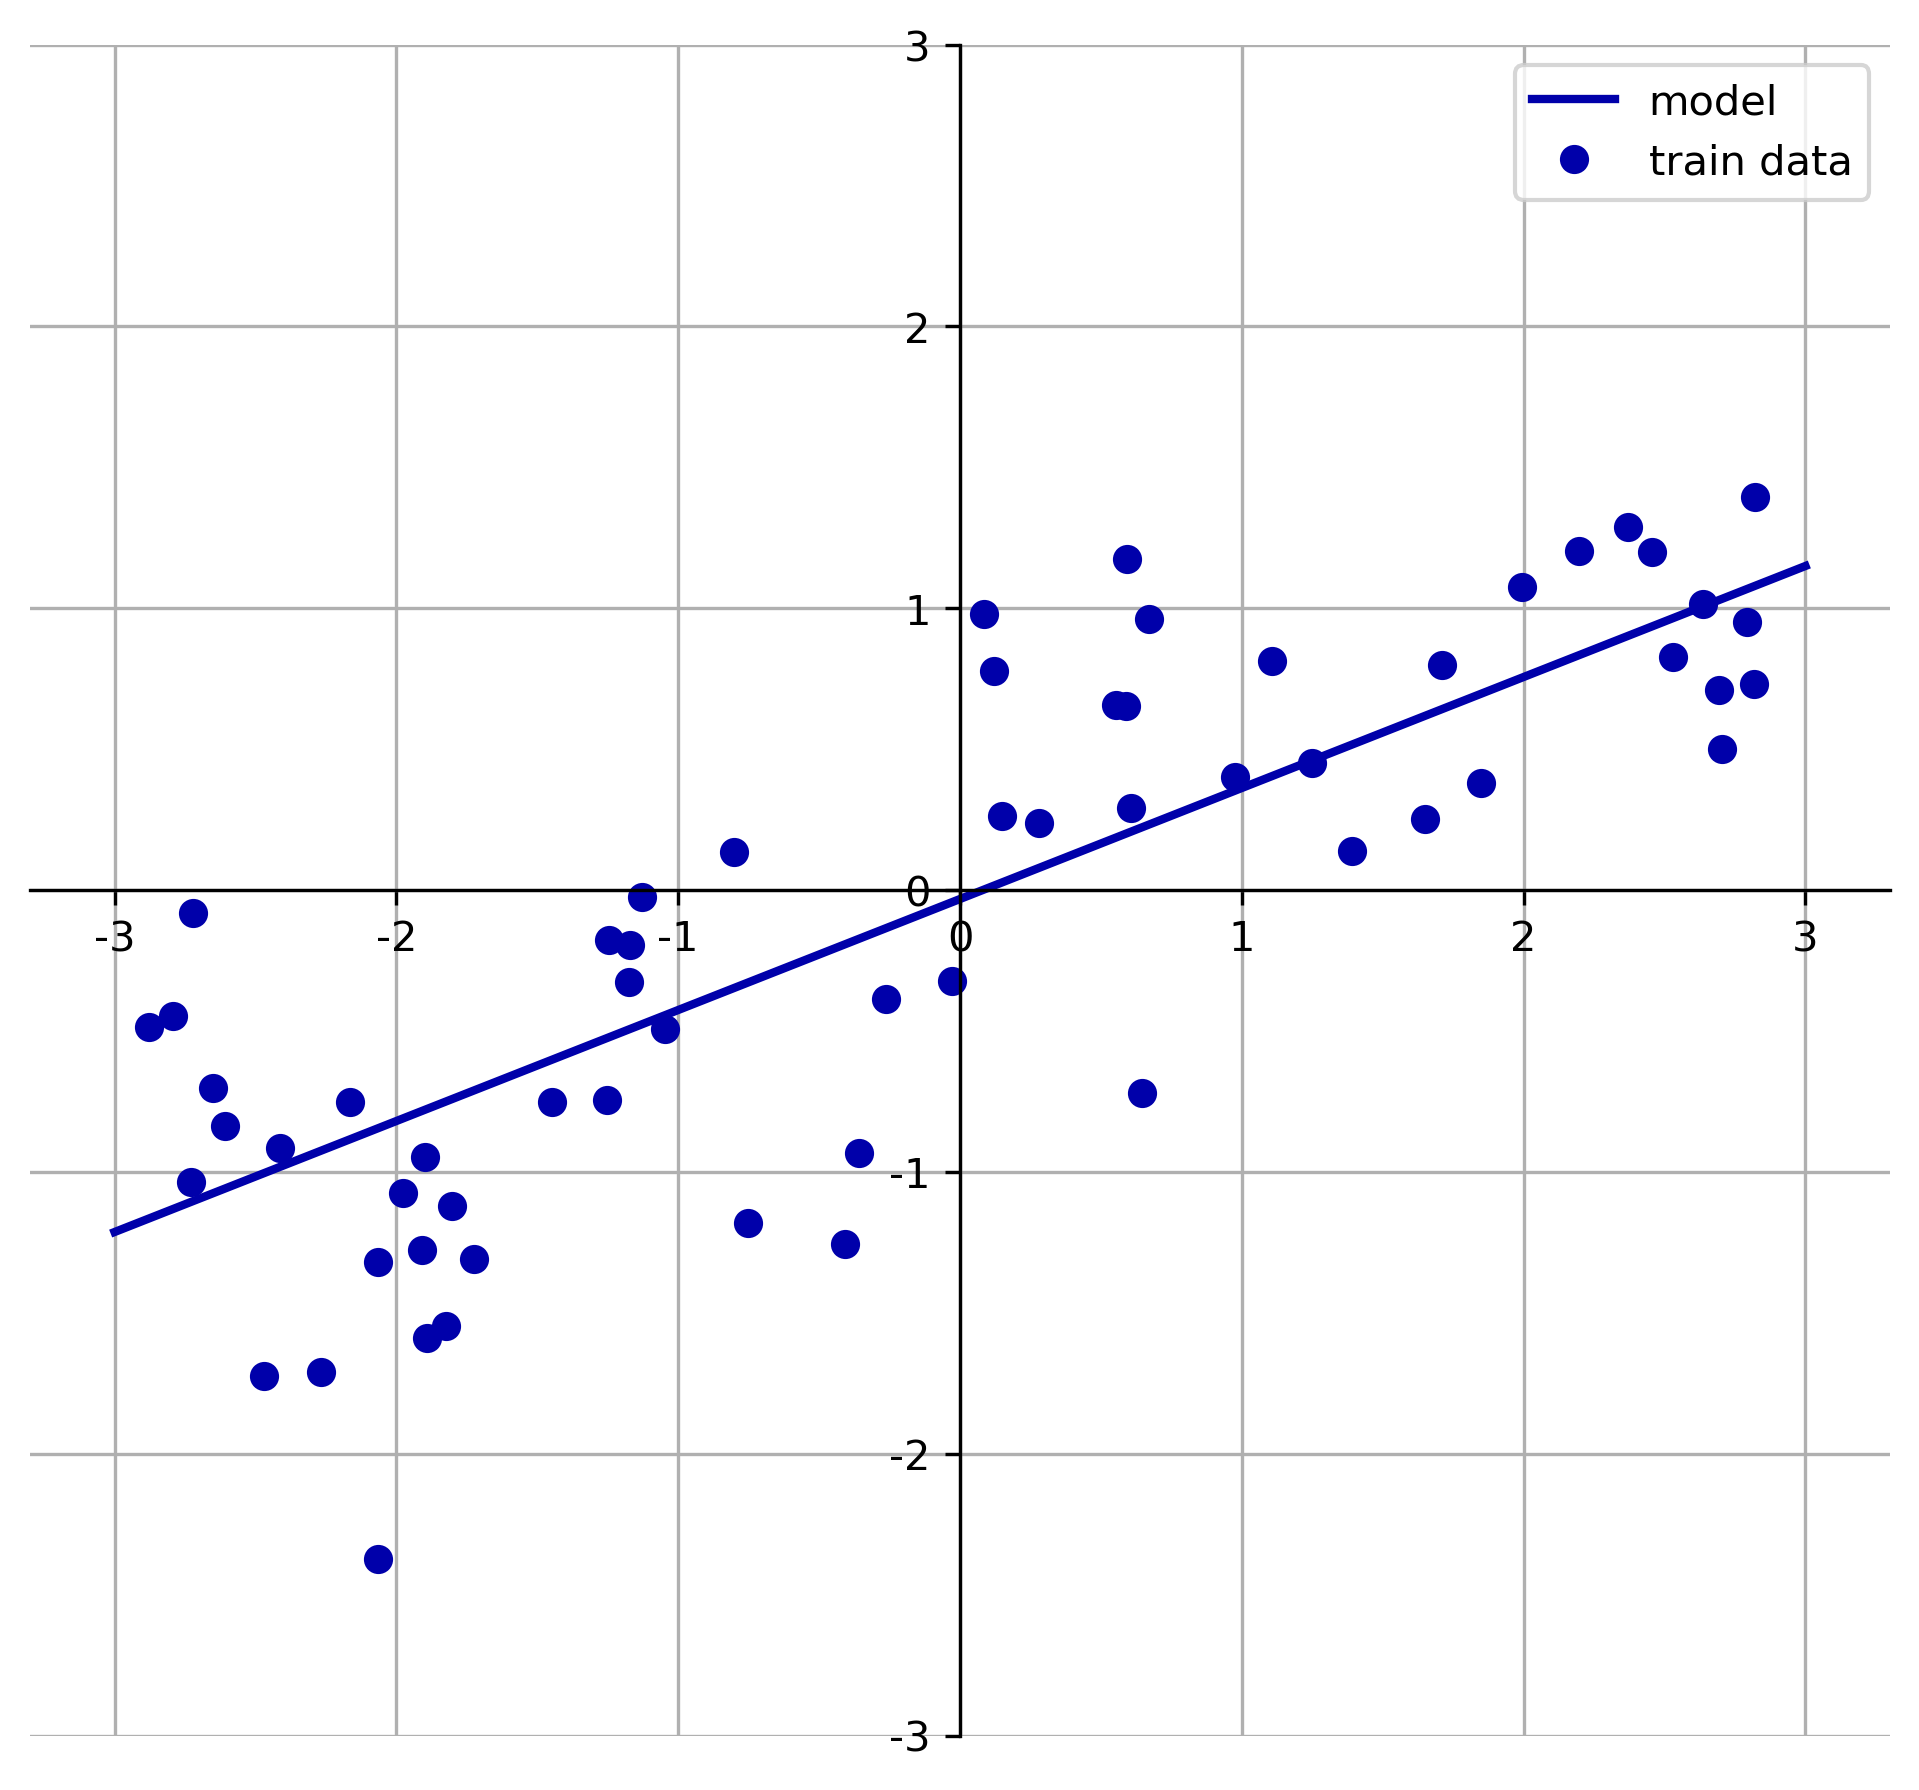

In [6]:
#선형 모델 - 선형 회귀 모델

mglearn.plots.plot_linear_regression_wave()

# 교제에서 제공하느 데이터에 plot_linear_regression_wave()를 실행

In [4]:
from sklearn.linear_model import LinearRegression

# LinearRegression은 선형 회귀
from sklearn.model_selection import train_test_split
# train_test_split은 트레인 셋과 테스트 셋을 나누주는 함수

x, y = mglearn.datasets.make_wave(n_samples=60)

# 데이터 제널레이션을 본다면 셈플을 60개의 x와 y가 반환이된다.

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42)

# 트렌인과 테스트 용으로 나누준다.

lr = LinearRegression().fit(xtrain,ytrain)

# 그리고 이렇게 나누주면 결과를 내준다. fit으로 결과를 수행해준다. 훈련데이터를 넣어준다.

In [7]:
print("lr.coef : ", lr.coef_) # W
print("lr.intercept_:", lr.intercept_) #b이다.

lr.coef :  [0.394]
lr.intercept_: -0.031804343026759746


In [14]:
print("훈련 세트 점수: {:.2f}".format(lr.score(xtrain, ytrain)))

# score가 하는 것은 성능측정을 위해서 하는 것이다. 위에 것은 트렌인을 이용한 성적
# 아래것은 테스트를 했을 때 성적

# 훈련과 테스트 점수의 차이가 많이 차이가 안나야 오버핏트가 발생하지 않는다.

print("테스트 세트 점수: {:.2f}".format(lr.score(xtest,ytest)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [15]:
x, y = mglearn.datasets.load_extended_boston()

print("x shape", x.shape) #셈플 갯수 , 피처(특징) 겟수
print("y shape", y.shape) #타겟값
# boston은 이전에 수업에서 다뤗습니다 모름
# boston은 zip값을 예측하는 거였다고 합니다

xtrain, xtest, ytrain,ytest = train_test_split(x,y,random_state=0)
lr = LinearRegression().fit(xtrain,ytrain)

x shape (506, 104)
y shape (506,)


In [10]:
print("훈련 세트 점수: {:.2f}".format(lr.score(xtrain, ytrain)))
print("테스트 세트 점수: {:.2f}".format(lr.score(xtest,ytest)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [17]:
#릿지 회귀

from sklearn.linear_model import Ridge

ridge = Ridge().fit(xtrain, ytrain) 

In [19]:
print("훈련 세트 점수: {:.2f}".format(ridge.score(xtrain, ytrain)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(xtest,ytest)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [29]:
ridge10 = Ridge(alpha=10).fit(xtrain,ytrain) 

print("훈련 세트 점수: {:.2f}".format(ridge10.score(xtrain, ytrain)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(xtest,ytest)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [22]:
ridge01 = Ridge(alpha=0.1).fit(xtrain,ytrain)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(xtrain, ytrain)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(xtest,ytest))) #26분 10초

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


In [37]:
#Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

x, y = mglearn.datasets.make_wave(n_samples=104)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42)
lasso = Lasso().fit(xtrain,ytrain)

In [38]:
print("훈련 세트 점수: {:.2f}".format(lasso.score(xtrain,ytrain)))
print("테스트 세트 점수: {:2f}".format(lasso.score(xtest,ytest)))
print("사용한 특성의 개수:",np.sum(lasso.coef_ != 0))

#특성의 객수가 0이 됐다는 것은 
# 특징이 104개라고 할때, x0 - x103 까지 있을 때, w0 - w103 까지 나오게 된다. w는 우리가 구하고자 하는 계수 (coeffiecnt)
# 만약에 W가 0 이 됐다고 하면 그 X 값은 필요가 없음을 의미한다.그래서 라소는 특징(feature)을 선별하는데도 사용이 된다.
# 0에 가까운 것은 별로 필요가 없기 때문에, ,np.sum(lasso.coef_ != 0) 에서 나온 것은 0이 아닌 것을 사용해 보았다.

훈련 세트 점수: 0.27
테스트 세트 점수: 0.243018
사용한 특성의 개수: 1


In [39]:
#"max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다.
lasso1 = Lasso(alpha=0.01, max_iter=100000).fit(xtrain,ytrain)

# iter는 훈련을 할때, 최적값을 찾기 위해서 반복을 하는 것을 의미한다.
# 반복 횟수를 늘렸을 때는 달라진다. 그럴 경우 정확도가 올라갔다.
# 그 이유는 일반화를 줄였다. 즉 alpha를 줄였기 때문에, 규제를 적게 한것이다.

In [40]:
print("훈련 세트 점수: {:.2f}".format(lasso1.score(xtrain,ytrain)))
print("테스트 세트 점수: {:2f}".format(lasso1.score(xtest,ytest)))
print("사용한 특성의 개수:",np.sum(lasso1.coef_ != 0))

훈련 세트 점수: 0.64
테스트 세트 점수: 0.727328
사용한 특성의 개수: 1


In [41]:
lasso2 = Lasso(alpha=0.00001, max_iter=100000).fit(xtrain,ytrain)

In [42]:
print("훈련 세트 점수: {:.2f}".format(lasso2.score(xtrain,ytrain)))
print("테스트 세트 점수: {:2f}".format(lasso2.score(xtest,ytest)))
print("사용한 특성의 개수:",np.sum(lasso2.coef_ != 0))

훈련 세트 점수: 0.64
테스트 세트 점수: 0.729085
사용한 특성의 개수: 1
